In [2]:
using CSV
using DataFrames
using Plots

data = "irisdata.csv" |> CSV.File |> DataFrame
data

,a,b,c,d,cluster
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
include("kMeans.jl")
include("seedMeans.jl")

minDist (generic function with 1 method)

In [4]:
dataPoints = Array(data[:,1:4])
print()

In [5]:
initialMeans = kpMeans(dataPoints,3)
#print(initialMeans,"\n")
(a,b) = kMeans(dataPoints,initialMeans,0.0000005)

([5.901612903225808 2.748387096774194 4.393548387096775 1.4338709677419357; 5.006 3.418 1.4639999999999997 0.244; 6.8500000000000005 3.0736842105263156 5.742105263157893 2.0710526315789473], [2.208270486040254, 0.5095799294033332, 0.4109303593904685, 0.11813843282479447, 0.12107649112411936, 0.0])

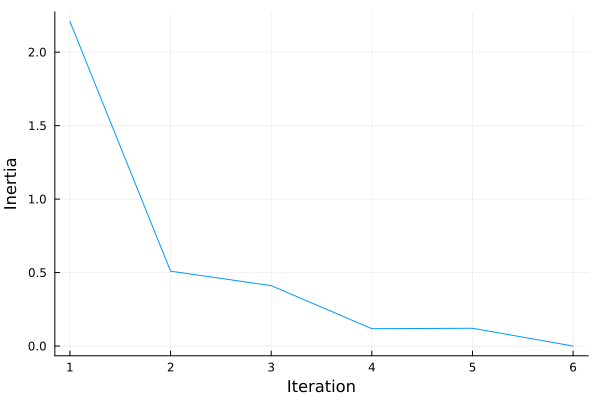

In [6]:
n = size(b)[1]
ns = 1:n
plot(ns,b, xlabel = "Iteration", ylabel = "Inertia", label = false)

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

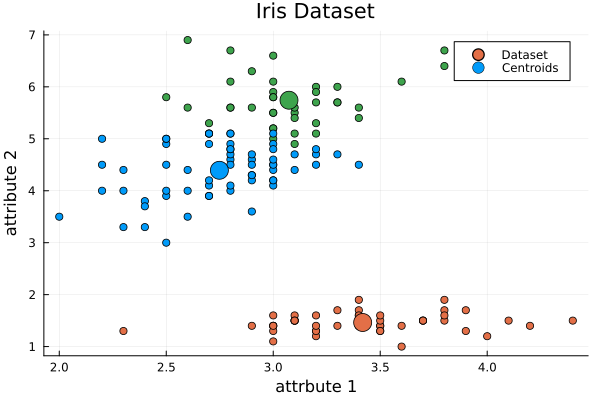

In [7]:
a
assocs = associateNearestMeans(dataPoints,a)

scatter(dataPoints[:,2],dataPoints[:,3], color = assocs, xlabel = "attrbute 1", ylabel = "attribute 2", label = "Dataset", markeralpha = 50)
scatter!(a[:,2],a[:,3],color = [1,2,3], label = "Centroids", markersize = 10, markeralpha = 100, title = "Iris Dataset")


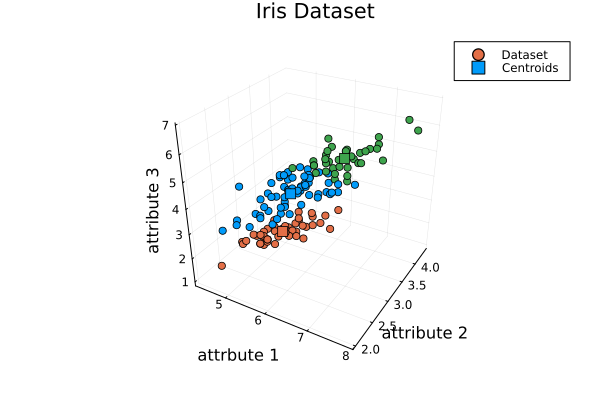

In [8]:
scatter(dataPoints[:,1],dataPoints[:,2],dataPoints[:,3], color = assocs, xlabel = "attrbute 1", ylabel = "attribute 2",zlabel = "attribute 3", label = "Dataset", markeralpha = 50)
scatter!(a[:,1],a[:,2],a[:,3],color = [1,2,3], label = "Centroids", markersize = 5, markeralpha = 100, markershape = :rect, title = "Iris Dataset")


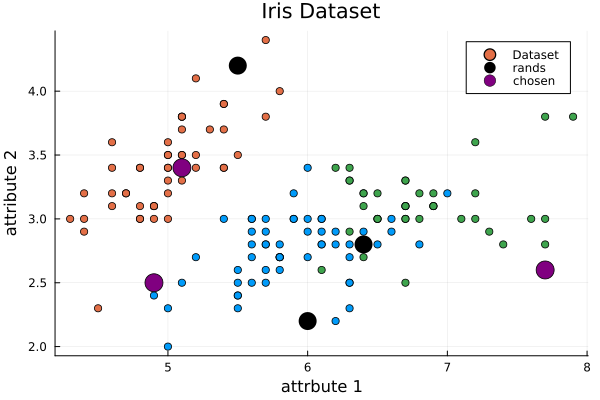

In [9]:

randoms = randomMeans(dataPoints,3)
kps     = kpMeans(dataPoints,3)

scatter(dataPoints[:,1],dataPoints[:,2], color = assocs, xlabel = "attrbute 1", ylabel = "attribute 2", label = "Dataset", markeralpha = 50)
scatter!(randoms[:,1],randoms[:,2],color = "black", label = "rands", markersize = 10, markeralpha = 100, title = "Iris Dataset")
scatter!(kps[:,1],kps[:,2],color = "purple", label = "chosen", markersize = 10, markeralpha = 100, title = "Iris Dataset")
